In [1]:
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
img_rows,img_cols=112,112

directory="C:\\Users\\ramij\\OneDrive\\Desktop\\data"
categories=["with_mask","without_mask"]

C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\pyth

In [2]:
i=1
images=[]
lables=[]
for cat in categories:
    path=os.path.join(directory,cat)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img=cv2.imread(img_path)
        try:
        #    images.append(img)
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
     #       print(resized_img.shape)
            images.append(resized_img) 
            lables.append(cat)
        except Exception as e:
            print('Exception:',e)
            break
            
            



In [3]:
x=len(images)

In [4]:

images=np.array(images)/255.0
images=np.reshape(images,(x,img_rows,img_cols,1))
print(images.shape)


(1376, 112, 112, 1)


In [5]:
print(lables[0])

with_mask


In [6]:
lb=LabelBinarizer()
lables=lb.fit_transform(lables)
lables=to_categorical(lables)
lables=np.array(lables)

In [7]:
(train_x,test_x,train_y,test_y) =train_test_split(images,lables,test_size=0.20,random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense ,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

num_classes=2
batch_size=32

Using TensorFlow backend.


In [9]:

model=Sequential()
model.add(Conv2D(64,(5,5),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 108, 108, 64)      1664      
_________________________________________________________________
activation_1 (Activation)    (None, 108, 108, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       204928    
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)           

In [10]:
from keras.optimizers import Adam
epochs =50
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001), 
             metrics=['accuracy'])
fitted_model=model.fit(train_x,train_y,epochs=epochs,
                       validation_split=0.25)


Train on 825 samples, validate on 275 samples
Epoch 1/50
825/825 [==============================] - 55s 66ms/step - loss: 0.8234 - accuracy: 0.5588 - val_loss: 0.5844 - val_accuracy: 0.6909
Epoch 2/50
825/825 [==============================] - 52s 63ms/step - loss: 0.5702 - accuracy: 0.6885 - val_loss: 0.4969 - val_accuracy: 0.7673
Epoch 3/50
825/825 [==============================] - 53s 64ms/step - loss: 0.4097 - accuracy: 0.8133 - val_loss: 0.5144 - val_accuracy: 0.7491
Epoch 4/50
825/825 [==============================] - 50s 60ms/step - loss: 0.2738 - accuracy: 0.8788 - val_loss: 0.3147 - val_accuracy: 0.8655
Epoch 5/50
825/825 [==============================] - 48s 59ms/step - loss: 0.1641 - accuracy: 0.9430 - val_loss: 0.3017 - val_accuracy: 0.8836
Epoch 6/50
825/825 [==============================] - 49s 59ms/step - loss: 0.1278 - accuracy: 0.9515 - val_loss: 0.2867 - val_accuracy: 0.8727
Epoch 7/50
825/825 [==============================] - 48s 58ms/step - loss: 0.1212 - accu

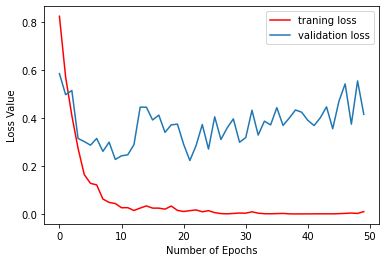

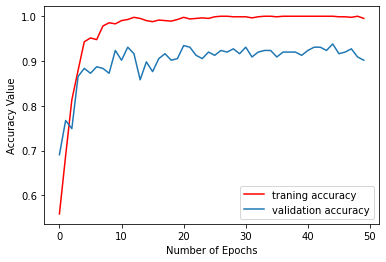

In [12]:
from matplotlib import pyplot as plt
plt.plot(fitted_model.history['loss'],'r',label='traning loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


plt.plot(fitted_model.history['accuracy'],'r',label='traning accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [13]:
model.save("new_model.h5")


1

In [1]:
from keras.models import load_model
model=load_model("new_model.h5")
from boltiot import Bolt
import requests
api_key = "fdeab2ce-f48b-494d-8320-934daf985f1c"
device_id  = "BOLT5780576"
mybolt = Bolt(api_key, device_id)
SID = 'ACa34a0082d6a5a0654cbf9e328b00664b' 
AUTH_TOKEN = 'ecb38ed8f0ba101fe30227afaaee216a' 
FROM_NUMBER = '+13346058499'
TO_NUMBER = '+916289730218'
API_KEY = 'fdeab2ce-f48b-494d-8320-934daf985f1c'
DEVICE_ID = 'BOLT5780576'
mybolt.isOnline() 

Using TensorFlow backend.
C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ramij\anaconda3\envs\my_new\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ramij\anaconda3\envs\my_new\lib\sit

'{"value": "offline", "time": null, "success": 1}'

In [2]:
import numpy as np
import serial
import cv2 

In [4]:


ser = serial.Serial('COM5', 9800, timeout=1)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
vid = cv2.VideoCapture(1) 
text_dict={0:'Mask On',1:'No Mask'}
rect_col={0:(0,255,0),1:(0,0,255)} 
# define a video capture object 
vid = cv2.VideoCapture(1) 

while(True): 
    ser.write(b'L')
    ret,frame = vid.read() 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(frame, scaleFactor = 1.1,minNeighbors = 5) 
    for (x,y,w,h) in faces: 
        resized_img=cv2.resize(gray,(112,112))
        normalized_img=resized_img/255
        reshaped_img=np.reshape(normalized_img,(1,112,112,1))
        result=model.predict(reshaped_img)
        label=np.argmax(result,axis=1)[0]
        print(label)
        if(label==1):
            ser.write(b'H')
            cv2.rectangle(frame,(x,y),(x+w,y+h),rect_col[label],2)
        else:
            ser.write(b'L')
            cv2.rectangle(frame,(x,y),(x+w,y+h),rect_col[label],2) 
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = frame[y:y+h, x:x+w] 
    cv2.imshow('frame', frame) 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        ser.write(b'L')
        break
ser.close()
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:

import serial
ser = serial.Serial('COM5', 9800, timeout=1)
ser.write(b'H')
ser.write(b'L')
ser.write(b'H')
ser.write(b'L')
ser.close()

In [ ]:
import cv2  
  
# load the required trained XML classifiers 
# https://github.com/Itseez/opencv/blob/master/ 
# data/haarcascades/haarcascade_frontalface_default.xml 
# Trained XML classifiers describes some features of some 
# object we want to detect a cascade function is trained 
# from a lot of positive(faces) and negative(non-faces) 
# images. 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
  
  
# capture frames from a camera 
cap = cv2.VideoCapture(1) 
  
# loop runs if capturing has been initialized. 
while 1:  
  
    # reads frames from a camera 
    ret, img = cap.read()  
  
    # convert to gray scale of each frames 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
    # Detects faces of different sizes in the input image 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
    for (x,y,w,h) in faces: 
        # To draw a rectangle in a face  
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),5)  
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w]  
  
    # Display an image in a window 
    cv2.imshow('img',img) 
  
    # Wait for Esc key to stop 
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
  
# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()  